In [1]:
import csv

# Open the insurance.csv file in read mode as alias using 'open' function.
with open('/Users/ashwinnallamothu/Desktop/Medical_Insurance/insurance.csv', 'r') as insurance_data:
  # Create a CSV reader object
  insurance_reader = csv.DictReader(insurance_data)

  # Loop over the rows of the CSV file and print their values, later closing the file with the 'with' context manager.
  for row in insurance_reader:
    print(row)


{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}
{'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}
{'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}
{'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges': '7281.

In [2]:
#Import Pandas library for data manipulation and analysis with alias 'pd'
import pandas as pd

# Load the dataset which will create a DataFrame or tabular data structure in Pandas
data = pd.read_csv('/Users/ashwinnallamothu/Desktop/Medical_Insurance/insurance.csv')

# Explore the dataset. 

#head will display first few rows of DataFrame which helps display content and structure. 
#info will provide information about the data types of the columns, the memory usage, etc. 
#describe will show summary stats like mean, std dev, min/max, etc.
print(data.head())
print(data.info())
print(data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [3]:
#Import necessary library to convert categorical data information into format that can be fed into machine learning algorithm. 
from sklearn.preprocessing import OneHotEncoder

# Load the data
data = pd.read_csv('/Users/ashwinnallamothu/Desktop/Medical_Insurance/insurance.csv')

# Convert categorical variables to one-hot encoding which take:
#'data': The DataFrame to be encoded
#'columns': A list of column names containing categorical variables that will be encoded.
#'drop_first' set as True will help avoid multicollinearity which can undermind statistical significance of independant variables by dropping the first category into each encoded column.
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)



/Users/ashwinnallamothu/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


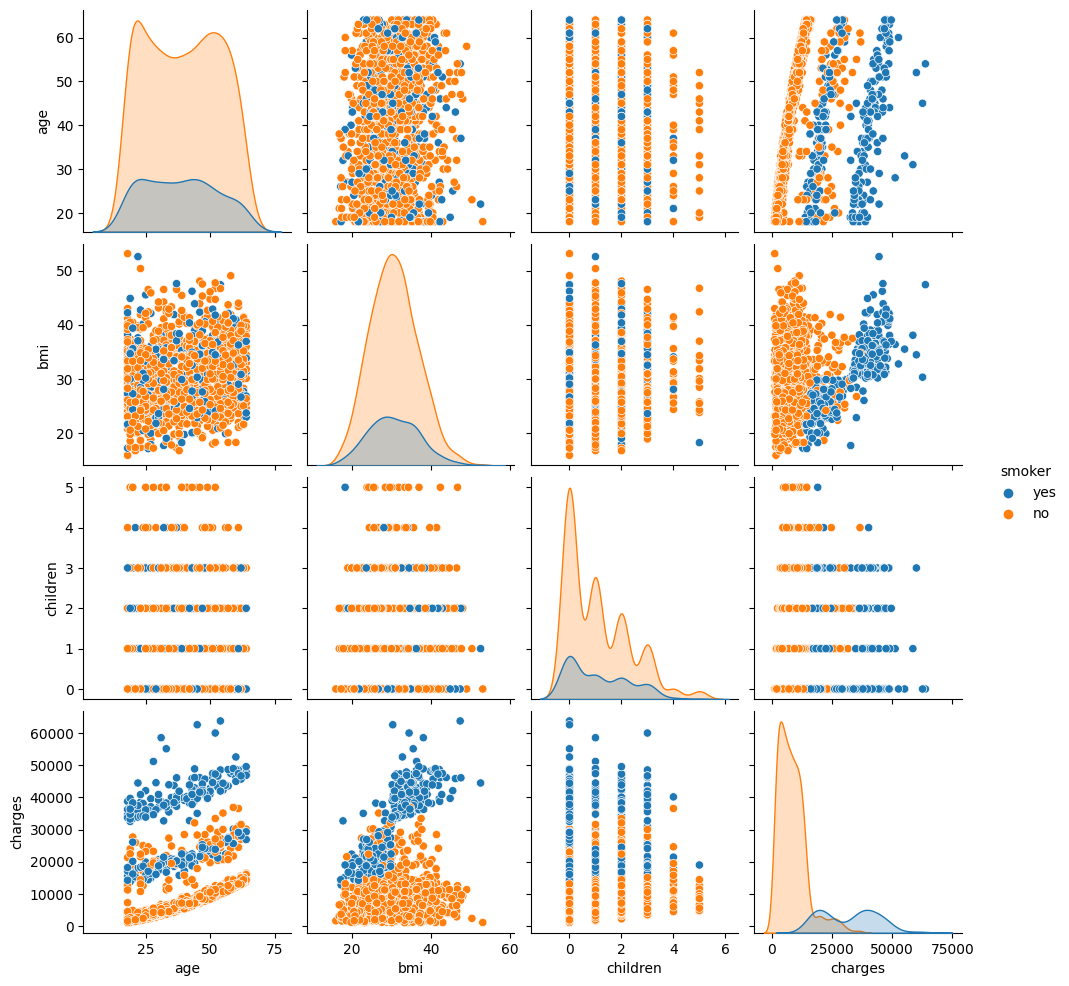

In [4]:
#Import matplotlib.pyplot which is a collection of functions that help matplotlib work lioke MATLAB
#Import is a data visulization library based on matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Use pairplot to plot pairwise relationships between variables and color them with 'hue' based on values of 'smoker' column.
sns.pairplot(data, hue='smoker')
#Display the plot
plt.show()


In [5]:
#Use Feature engineering to create new features or transform existing ones to improve the performance of a machine learning model.
#Categorize bmi data with 'pd.cut' into new column into bins to provide the model with context.
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [6]:
#Split data into training set and testing set.
#Predict value of variable based on value of another variable.
#Measure the average magnitude of absolute value of errors in a set of predictions.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Split data into features and target variable
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

#Split data into training and testing sets.
#test_size will determine the portion of the data which will go into the test set and random state will control the random number generator used to shuffle the data before splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


In [7]:
# Get the coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients and their corresponding feature names
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to see the most influential features
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coeff_df)


            Feature   Coefficient  Absolute Coefficient
4        smoker_yes  23651.128856          23651.128856
7  region_southwest   -809.799354            809.799354
6  region_southeast   -657.864297            657.864297
2          children    425.278784            425.278784
5  region_northwest   -370.677326            370.677326
1               bmi    337.092552            337.092552
0               age    256.975706            256.975706
3          sex_male    -18.591692             18.591692


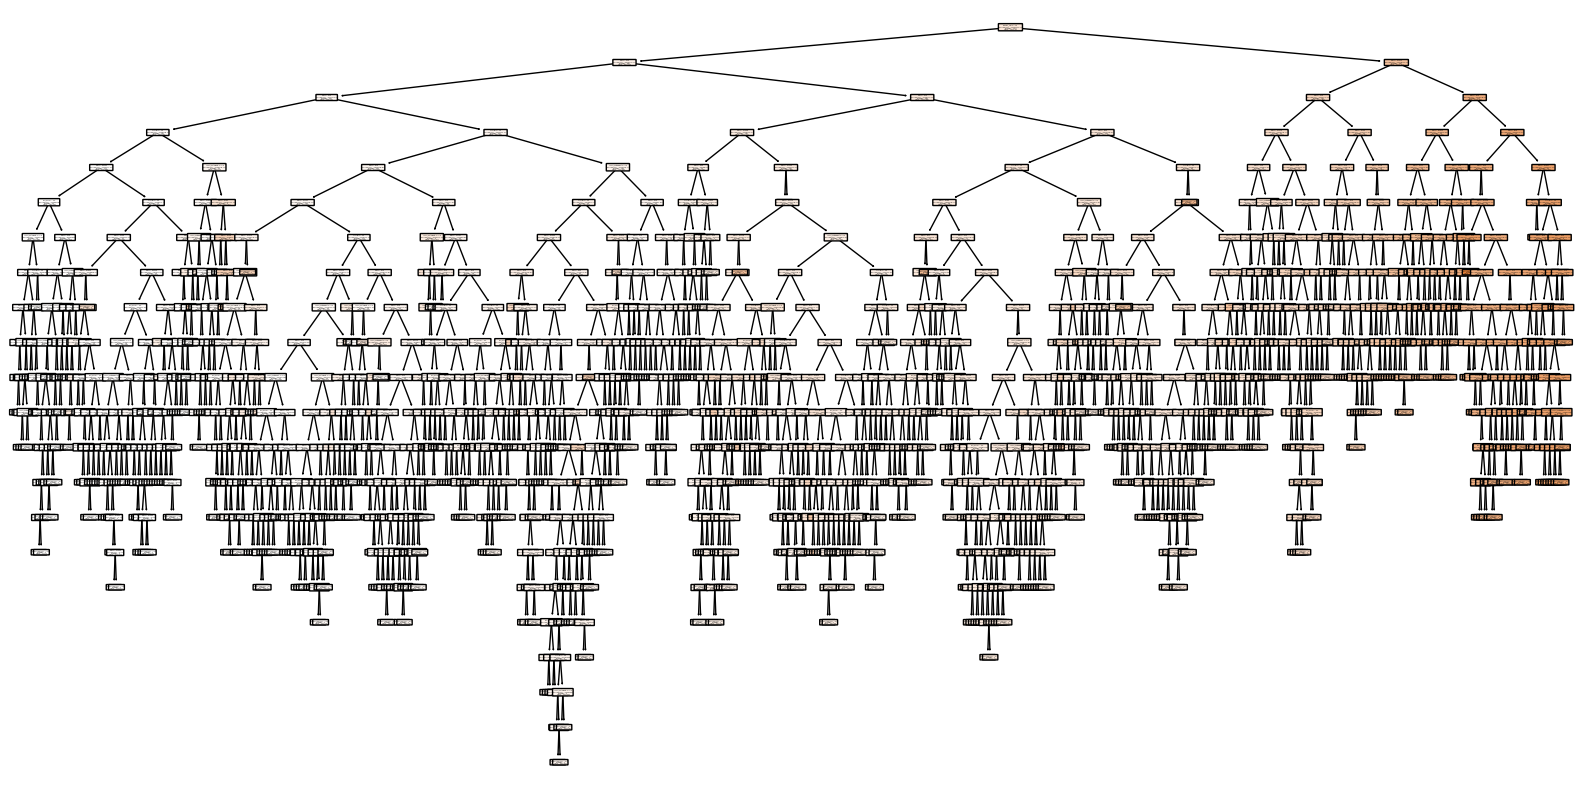

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Train a decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, dt_model.predict(X_test))

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_model.predict(X_test))


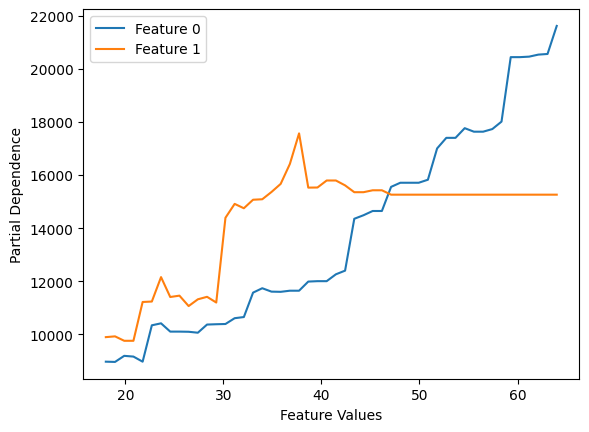

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Train a gradient boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_model.predict(X_test))

# Choose the features you want to visualize partial dependence for
features = [0, 1]  # Indices of 'age' and 'bmi' in your dataset

# Create a grid of feature values for partial dependence calculation
feature_values = np.linspace(X_train.iloc[:, features[0]].min(), X_train.iloc[:, features[0]].max(), 50)
pd_results = []

# Calculate partial dependence for the chosen features
for feature in features:
    pd_feature = []
    for value in feature_values:
        X_temp = X_train.copy()
        X_temp.iloc[:, feature] = value
        pd_feature.append(np.mean(gb_model.predict(X_temp)))
    pd_results.append(pd_feature)

# Create a plot of partial dependence
fig, ax = plt.subplots()
for i, feature in enumerate(features):
    ax.plot(feature_values, pd_results[i], label=f'Feature {feature}')
ax.set_xlabel('Feature Values')
ax.set_ylabel('Partial Dependence')
ax.legend()
plt.show()


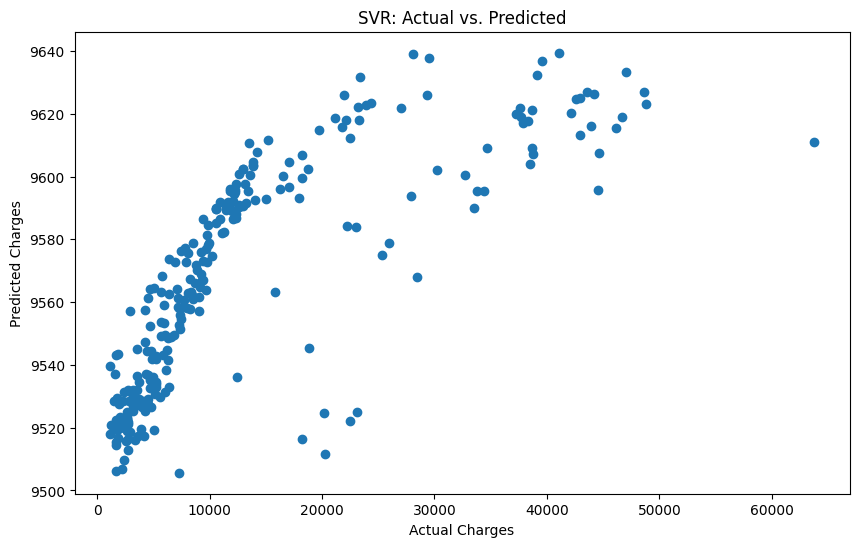

SVR Mean Absolute Error: 8612.408423351833


In [11]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming you have your dataset stored in X and y
# X: Features, y: Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Visualize the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_model.predict(X_test_scaled))
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('SVR: Actual vs. Predicted')
plt.show()

# Evaluate the model
svr_mae = mean_absolute_error(y_test, svr_model.predict(X_test_scaled))
print("SVR Mean Absolute Error:", svr_mae)


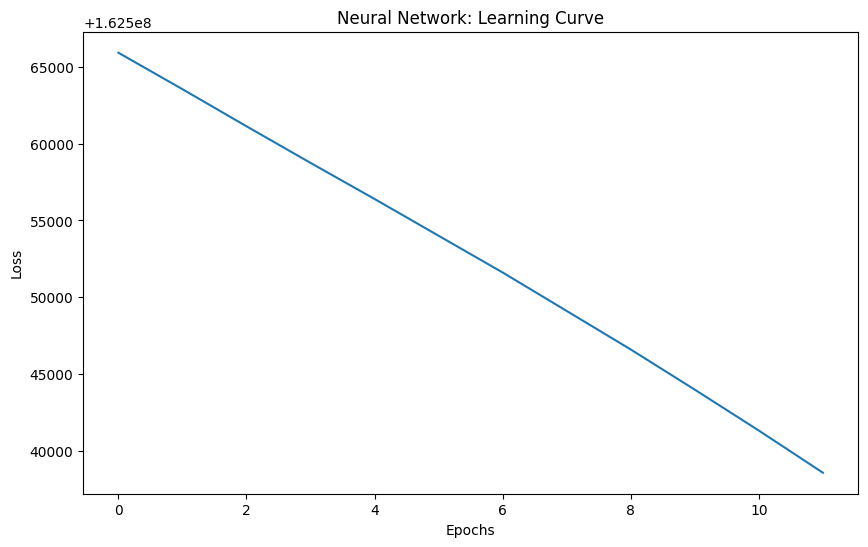

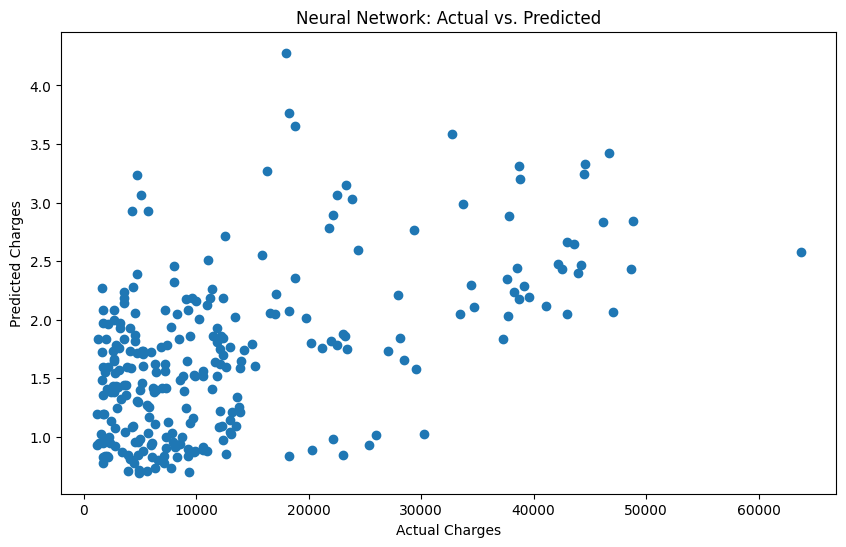

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Scale the features for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a neural network model
nn_model = MLPRegressor(random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2)
nn_model.fit(X_train_scaled, y_train)

# Evaluate the model
nn_mae = mean_absolute_error(y_test, nn_model.predict(X_test_scaled))

plt.figure(figsize=(10, 6))
plt.plot(nn_model.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network: Learning Curve')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_model.predict(X_test_scaled))
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Neural Network: Actual vs. Predicted')
plt.show()


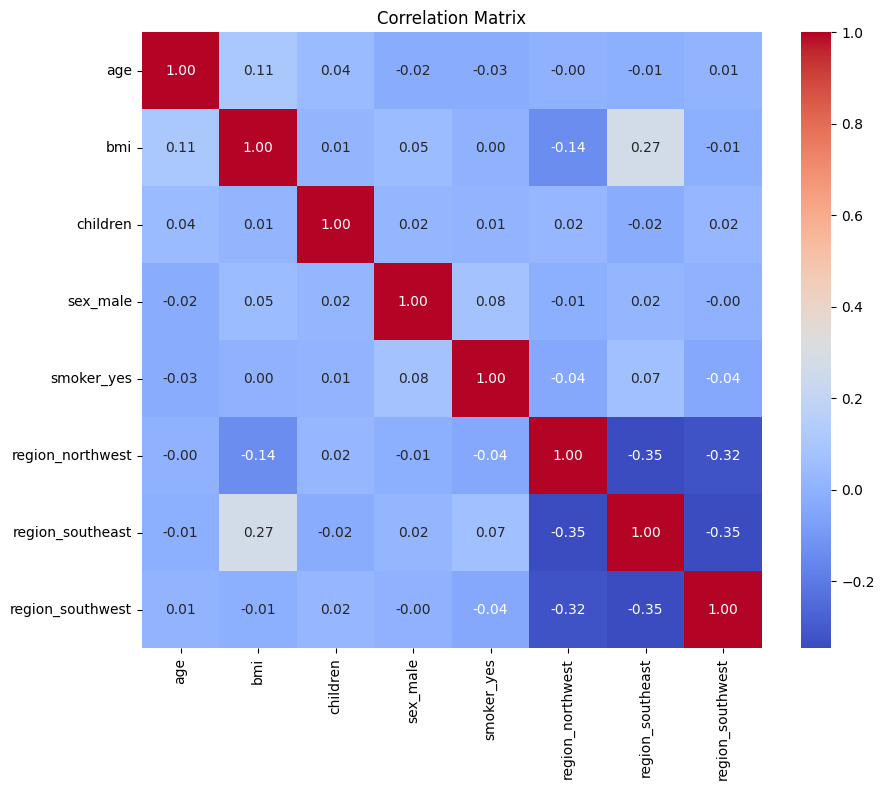

In [13]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
